In [170]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt

# Model 2.0
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [160]:
data = pd.read_csv('./day.csv', delimiter=',')
data = data.drop(['dteday'], axis=1)
data = data.drop(['instant'], axis=1)

<Axes: xlabel='temp', ylabel='Density'>

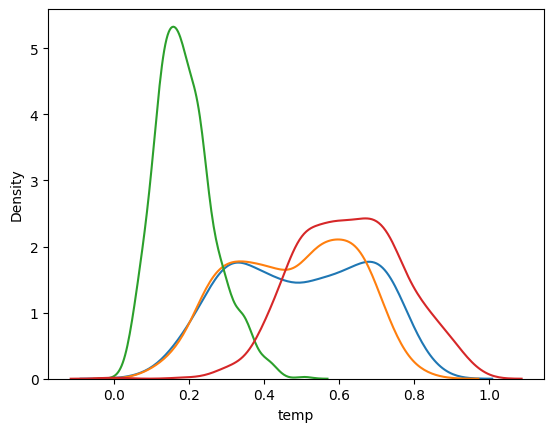

In [7]:
sns.kdeplot(data['temp'])
sns.kdeplot(data['atemp'])
sns.kdeplot(data['windspeed'])
sns.kdeplot(data['hum'])

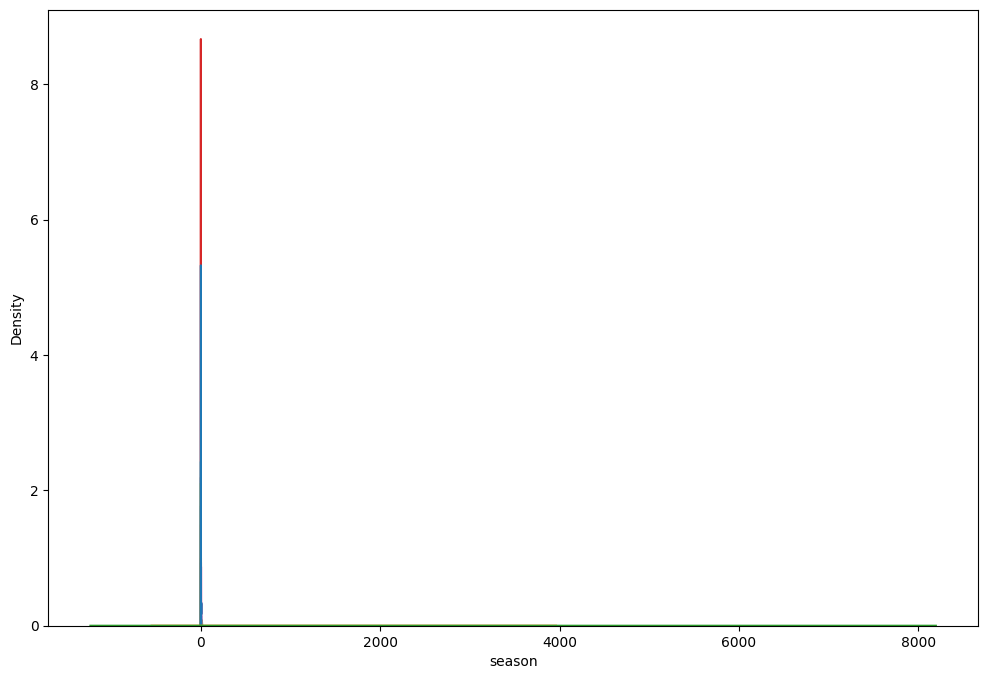

In [5]:
plt.figure(figsize=(12, 8))
for i in data.drop(['cnt'], axis=1).columns:
    sns.kdeplot(data[i])

In [31]:
# names = x.columns
# scaler = preprocessing.MinMaxScaler()

# pr_d = scaler.fit_transform(x)

# x_scaled = pd.DataFrame(pr_d, columns=names)

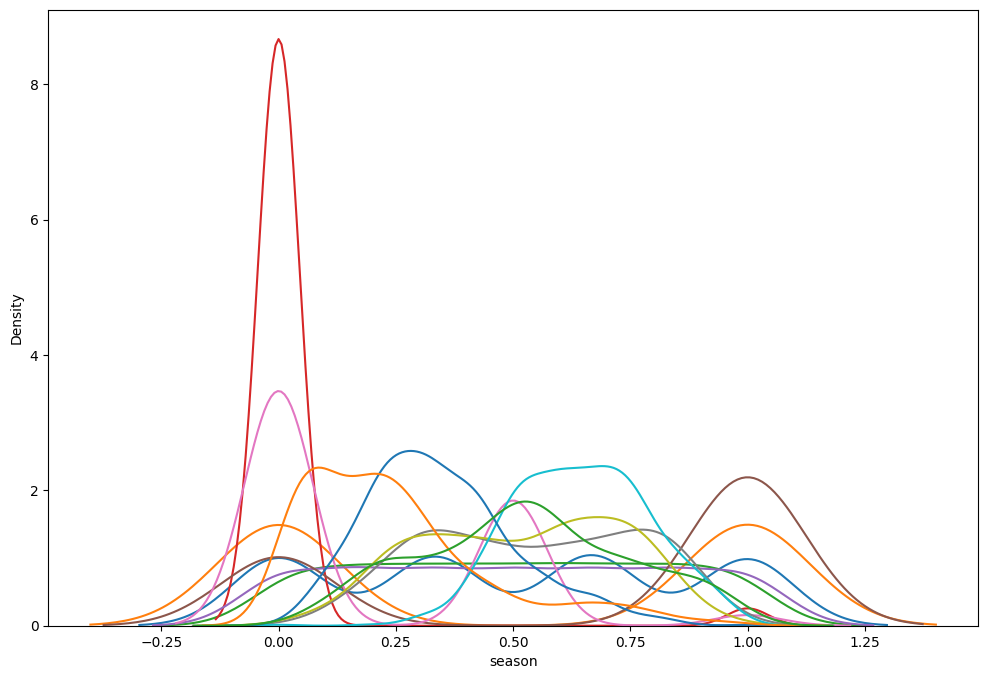

In [61]:
plt.figure(figsize=(12, 8))
for i in x_scaled.columns:
    sns.kdeplot(x_scaled[i])

In [66]:
print(np.mean(x_scaled.values))
print(np.std(x_scaled.values))

0.44147892602582794
0.3469131045234072


In [68]:
x = x_scaled.values
y = y.values

In [74]:
model = LinearRegression();
model.fit(x, y)

LinearRegression()

In [118]:
prediction = model.predict(x)

RSS = ((y - prediction) ** 2).sum()
TSS = ((y - y.mean()) ** 2).sum()

accuracy = 1 - RSS / TSS

In [119]:
predictionClass = [1 if prediction[i] > 1 else 0 for i in range(prediction.shape[0])]

In [2]:
# print(metrics.classification_report(y, predictionClass, zero_division=0))

# metrics.confusion_matrix(y, predictionClass)

In [164]:
# Model 2.0 Расчет зависимости количества арендованных велосипедов от остальных параметров

needed_columns = ['temp', 'hum', 'windspeed', 'cnt'] 
data = data[needed_columns]

x = data.drop(['cnt'], axis=1)
y = data['cnt']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [162]:
X_train.shape, Y_train.shape

((584, 3), (584,))

In [148]:
X_test.shape, Y_test.shape

((147, 1), (147,))

In [165]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [166]:
Y_pred = model.predict(X_test)

In [167]:
# Prediction results
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('MSE: %.2f' % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(Y_test, Y_pred))

Coefficients:  [ 6714.77908228 -2965.88847316 -5069.03592717]
Intercept:  3966.6199054219637
MSE: 2022926.45
Coefficient of determination (R^2): 0.39


In [168]:
Y_test

136    4123
659    6824
28     1098
597    6530
598    7006
       ... 
112    4036
153    5312
578    7580
228    4694
209    3846
Name: cnt, Length: 147, dtype: int64

0.39042161756317284

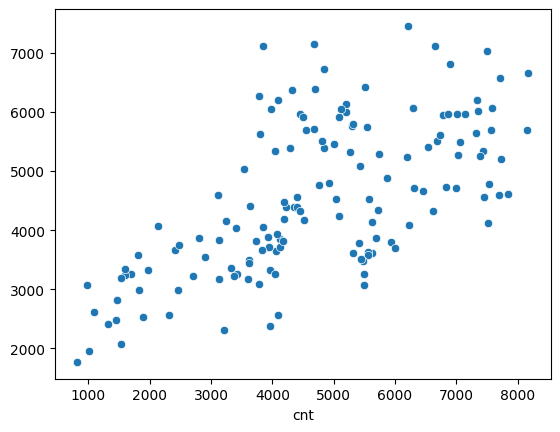

In [169]:
sns.scatterplot(x=Y_test, y=Y_pred)
r2_score(Y_test, Y_pred)